In [56]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [57]:
plt.style.use('fivethirtyeight')
cols=["forex_rate","cpi","ppi","bank_rate","current_account","inflation_rate","gdp","per1","per2","per3"]
data=pd.read_table('Workbook3.csv',sep=',',names=cols,parse_dates=[0], index_col=0,header=0)
data.forex_rate=data.forex_rate.astype(float)
data.head()

,forex_rate,cpi,ppi,bank_rate,current_account,inflation_rate,gdp,per1,per2,per3
1973-01-04,8.00,5.249812,43.0,6.0,-216000000.0,0.0,2.110000e+11,8.02,8.02,8.02
1973-01-05,8.01,5.249812,43.0,6.0,-216000000.0,0.0,2.110000e+11,8.00,8.02,8.02
1973-01-06,8.01,5.249812,43.0,6.0,-216000000.0,0.0,2.110000e+11,8.01,8.00,8.02
1973-01-07,8.01,5.249812,43.0,6.0,-216000000.0,0.0,2.110000e+11,8.01,8.01,8.00
1973-01-08,8.00,5.249812,43.0,6.0,-216000000.0,0.0,2.110000e+11,8.01,8.01,8.01


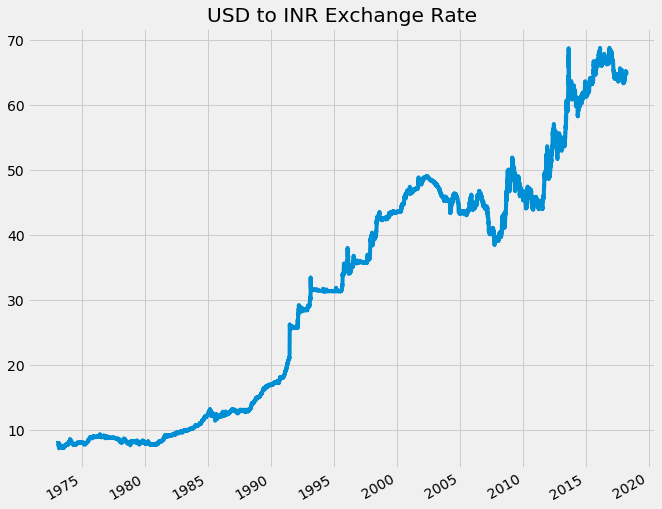

In [80]:
data.forex_rate.plot()
plt.title('USD to INR Exchange Rate')
plt.show()

In [58]:
cols2=["cpi","ppi","bank_rate","current_account","inflation_rate","gdp","per1","per2","per3"]
y=data["forex_rate"]
x=data[cols2]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,test_size=0.25,random_state=0)

In [59]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

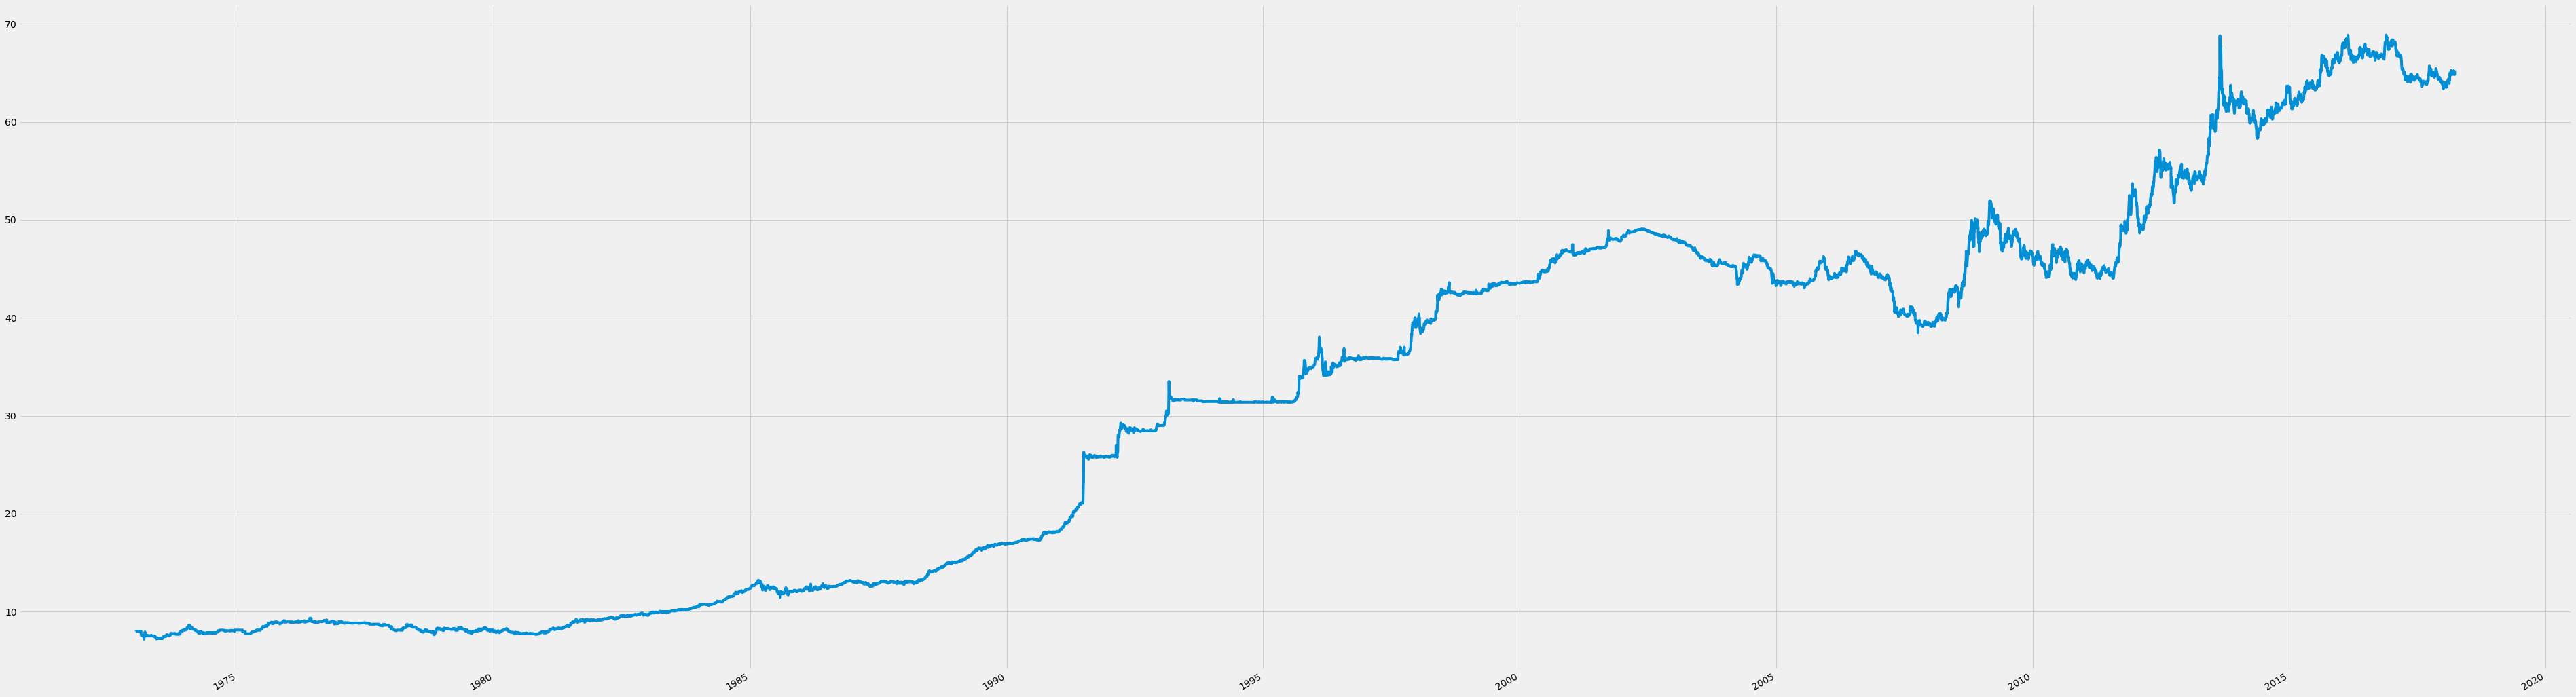

In [81]:
#checking stationarity
y=data["forex_rate"]
y.plot(figsize=(60,20))
plt.show()

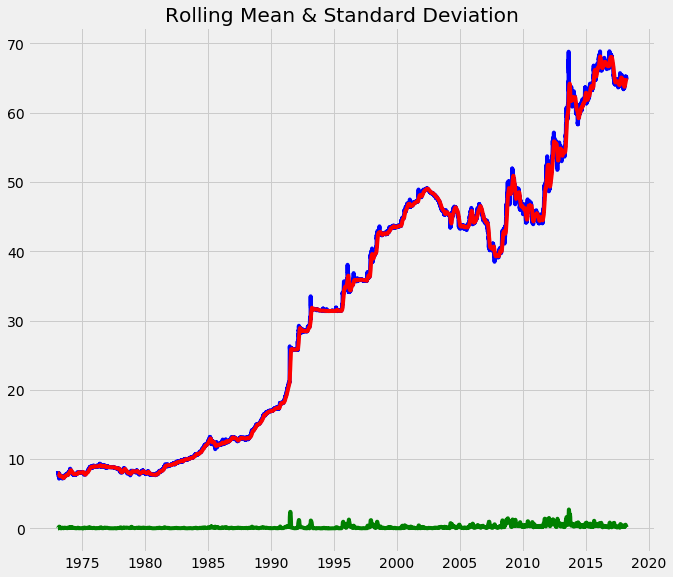

In [82]:
#checking stationarity
rolmean=y.rolling(30).mean()
rolstd=y.rolling(30).std()
plt.plot(y, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='green', label = 'Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


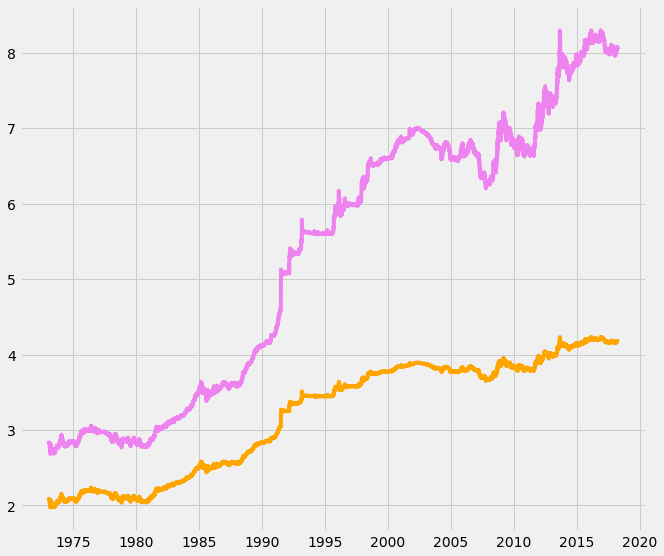

In [83]:
#transformation using sqrt and log
y_log = np.log(y)
y_log.dropna(inplace=True)
y_sqrt = np.sqrt(y)
plt.plot(y_log,color='orange')
plt.plot(y_sqrt,color='violet')
plt.show()

In [84]:
'''#differencing
y_log_diff = y_log - y_log.shift()
y_log_diff.plot()
y_log_diff.dropna(inplace=True)'''

'#differencing\ny_log_diff = y_log - y_log.shift()\ny_log_diff.plot()\ny_log_diff.dropna(inplace=True)'

In [85]:
y_log=pd.DataFrame(y_log)

#decompsition
from statsmodels.tsa.seasonal import seasonal_decompose
dec = seasonal_decompose(y_log,model='multiplicative',freq=1)
trend = dec.trend
seasonal = dec.seasonal
residual = dec.resid


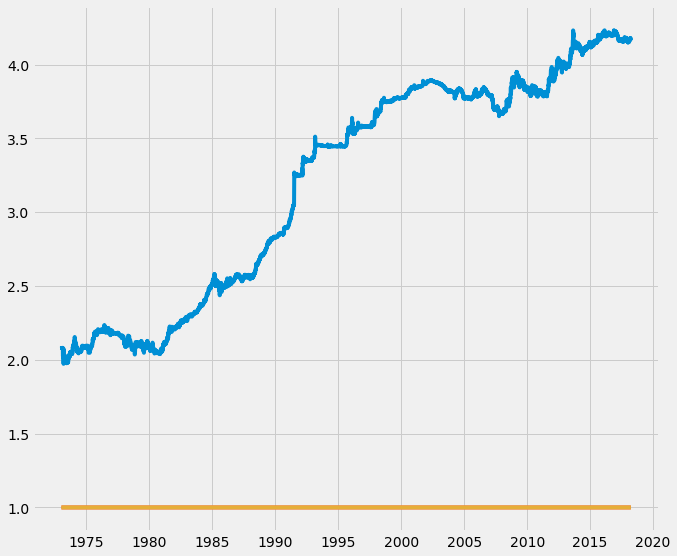

In [86]:
plt.plot(trend, label='Trend')
plt.plot(seasonal,label='Seasonality')
plt.plot(residual, label='Residuals')


Text(0.5, 1.0, 'Autocorrelation Function')

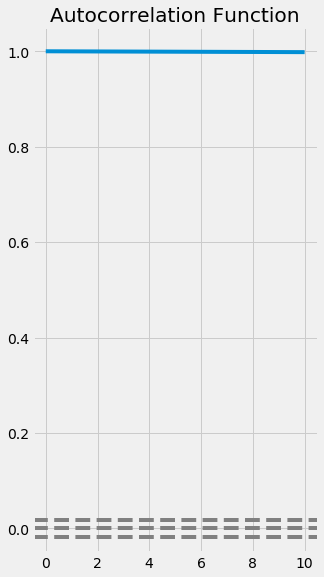

In [87]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(y_log, nlags=10)
lag_pacf = pacf(y_log, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


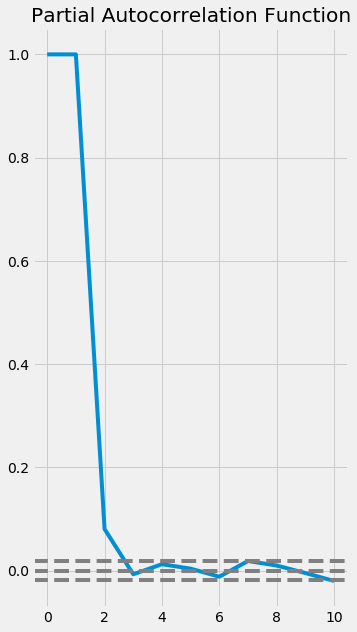

In [88]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [89]:
# p can be 0, 1, 2
#q can be 0, 1, 2, 3, 4...
# d can be 0, 1 or 2
from statsmodels.tsa.arima_model import ARIMA
"""
for p in range(3):
    for q in range(3):
        for d in range(3):
            print p,q,d
           """
"""residual=pd.DataFrame(result.resid)
residual.plot()
print residual.describe()"""

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [90]:
y_train,y_test=np.split(y_log, indices_or_sections=[10812], axis=0)

model= ARIMA(y_train,order=(1,1,1))
model_fit=model.fit()
output = model_fit.forecast(100)
#plt.plot(y_train, color='blue')
#plt.plot(result, color='red')
#plt.show()


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [91]:
"""history = [x for x in y_train['forex_rate']]
print len(history)
predictions = list()
i=0
#for t in range(len(y_test)):
for t in range(100):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = y_test['forex_rate'][t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, y_test['forex_rate'][t]))
    i+=1
print i"""

"history = [x for x in y_train['forex_rate']]\nprint len(history)\npredictions = list()\ni=0\n#for t in range(len(y_test)):\nfor t in range(100):\n    model = ARIMA(history, order=(1,1,1))\n    model_fit = model.fit()\n    output = model_fit.forecast()\n    yhat = output[0]\n    predictions.append(yhat)\n    obs = y_test['forex_rate'][t]\n    history.append(obs)\n    print('predicted=%f, expected=%f' % (yhat, y_test['forex_rate'][t]))\n    i+=1\nprint i"

(58, 63)

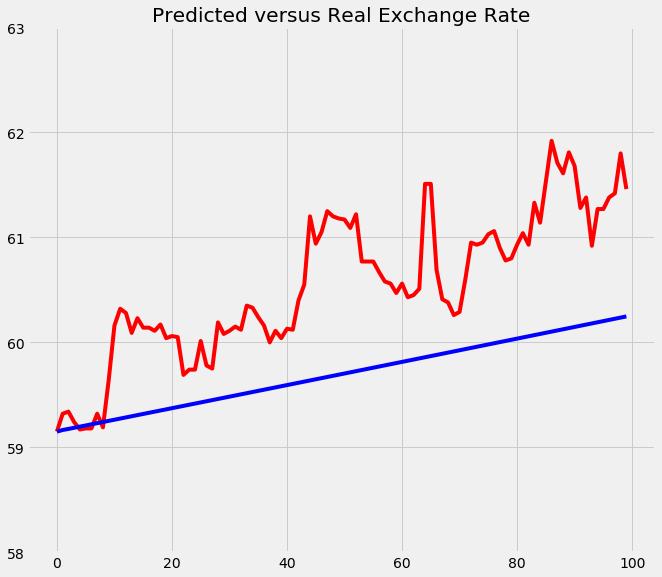

In [93]:
plt.plot(np.exp(list(y_test['forex_rate'][:100])), color='red')
plt.plot(np.exp(output[0]), color='blue')
plt.title('Predicted versus Real Exchange Rate')
plt.ylim([58,63])

Text(0.5, 1.0, 'Predicted versus Real Exchange Rate')

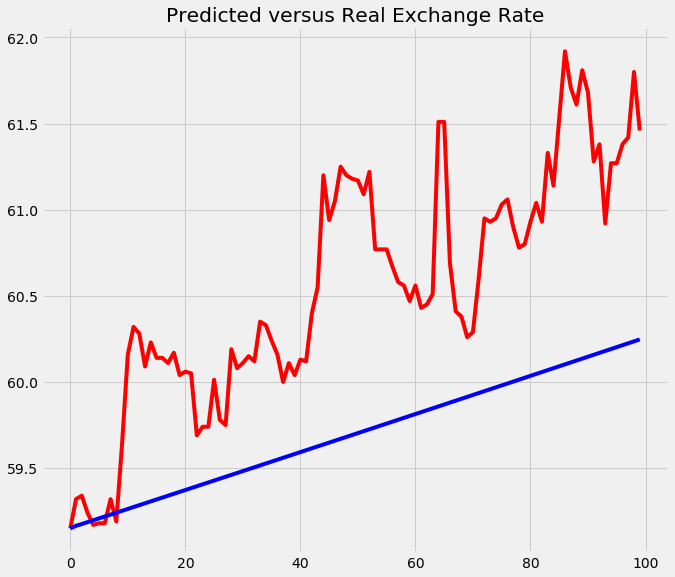

In [94]:

plt.plot(np.exp(list(y_test['forex_rate'][:100])), color='red')
plt.plot(np.exp(output[0]), color='blue')
plt.title('Predicted versus Real Exchange Rate')